In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from train_selection_MAE import Edge, Node, Graph
import seaborn as sns
import os

### initialization

In [2]:
dir = "pancreas_output"
if not os.path.exists(dir):
    os.makedirs(dir)

In [3]:
# uncomment the line below to run but there are existing files for demo
# !python ../train_net/corr.py --csv_path '../csv/train_path_pc.csv' --num_biomarkers 24 --save_path 'pancreas_output/mae_mtx_pc'  # get initial edge weights
scores = np.load("pancreas_output/mae_mtx_pc.npy")

In [4]:
# """make heatmap to visualize correlation matrix"""
# plt.figure(figsize=(15, 15))
# sns.heatmap(scores, cmap="RdBu_r", center=0)
# plt.show()

In [5]:
num_biomarkers = scores.shape[0]

nodes = []
for i in range(num_biomarkers):
    nodes.append(Node(i, num_biomarkers))

edges = []
for i in range(num_biomarkers):
    for j in range(i+1,num_biomarkers):
        edge = Edge(scores[i,j])
        edge.nodes = (i,j)
        edges.append(edge)
        nodes[i].edges.append(edge)
        nodes[j].edges.append(edge)

g = Graph(nodes,edges, num_biomarkers)

# chose the 1st input
node_degrees = []
for n in g.nodes:
    degree = sum(e.value for e in n.edges)
    minDegree = min(e.value for e in n.edges)
    n.init_degree = minDegree
    node_degrees.append(degree)
x = np.argmin(node_degrees)
# print(np.min(node_degrees))

g.input_.append(x)
idx = int(g.input_[-1])

print("add marker",idx, "into input")
print("input:", g.input_)

for i in g.output:
    if i == idx:
        g.output.remove(i)
print("output: ", g.output)

out = g.output.copy()

add marker 18 into input
input: [18]
output:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23]


### Round1

In [6]:
# train the network with currect input and output markers 
# !python ../train_net/train_model.py  --n_iter 4000  --interval_save 200 --iter_checkpoint 200 --buffer_size 45  --path_run_dir 'test_models_pc_01'  --path_dataset_csv "../csv/train_path_pc.csv"  --path_dataset_val_csv "../csv/val_path_pc.csv"  --input_index 18  --target_index 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 19 20 21 22 23   --in_dim 1 --out_dim 23
# !python ../train_net/validation.py  --n_iter 4000 --path_run_dir 'test_models_pc_01'  --path_output_dir 'pancreas_output/val_vae_01.npy' --path_dataset_val_csv "../csv/val_path_pc.csv"   --input_index  18  --target_index 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 19 20 21 22 23  --in_dim 1 --out_dim 23

In [7]:
val_loss_path = r'pancreas_output/val_vae_01.npy'
idx = g.updateAndFindNext(idx, val_loss_path)
out_drop = out.index(idx) # index of added input in the previous target list
print("--out_drop_index:", out_drop)
out = g.output.copy()

add 0 into input
input: [18, 0]
output:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23]
--out_drop_index: 0


### Round2

In [8]:
# !python ../train_net/train_model.py  --n_iter 4000  --interval_save 200 --iter_checkpoint 200 --buffer_size 45  --path_run_dir 'test_models_pc_02' --path_pretrain_dir 'test_models_pc_01' --path_dataset_csv "../csv/train_path_pc.csv"  --path_dataset_val_csv "../csv/val_path_pc.csv" --out_drop_index 0 --input_index 18 0  --target_index 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 19 20 21 22 23   --in_dim 2 --out_dim 22
# !python ../train_net/validation.py  --n_iter 4000 --path_run_dir 'test_models_pc_02'  --path_output_dir 'pancreas_output/val_vae_02.npy' --path_dataset_val_csv "../csv/val_path_pc.csv"   --input_index  18 0  --target_index 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 19 20 21 22 23  --in_dim 2 --out_dim 22

In [9]:
val_loss_path = r'pancreas_output/val_vae_02.npy'
idx = g.updateAndFindNext(idx, val_loss_path)
out_drop = out.index(idx) # index of added input in the previous target list
print("--out_drop_index:", out_drop)
out = g.output.copy()

add 23 into input
input: [18, 0, 23]
output:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22]
--out_drop_index: 21


### Round3

In [10]:
# !python ../train_net/train_model.py  --n_iter 4000  --interval_save 200 --iter_checkpoint 200 --buffer_size 45  --path_run_dir 'test_models_pc_03' --path_pretrain_dir 'test_models_pc_02' --path_dataset_csv "../csv/train_path_pc.csv"  --path_dataset_val_csv "../csv/val_path_pc.csv" --out_drop_index 21 --input_index 18 0 23 --target_index 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 19 20 21 22    --in_dim 3 --out_dim 21
# !python ../train_net/validation.py  --n_iter 4000 --path_run_dir 'test_models_pc_03'  --path_output_dir 'pancreas_output/val_vae_03.npy' --path_dataset_val_csv "../csv/val_path_pc.csv"   --input_index  18 0 23 --target_index 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 19 20 21 22  --in_dim 3 --out_dim 21

In [11]:
val_loss_path = r'pancreas_output/val_vae_03.npy'
idx = g.updateAndFindNext(idx, val_loss_path)
out_drop = out.index(idx) # index of added input in the previous target list
print("--out_drop_index:", out_drop)
out = g.output.copy()

add 7 into input
input: [18, 0, 23, 7]
output:  [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22]
--out_drop_index: 6


### Round4

In [12]:
# !python ../train_net/train_model.py  --n_iter 4000  --interval_save 200 --iter_checkpoint 200 --buffer_size 45  --path_run_dir 'test_models_pc_04' --path_pretrain_dir 'test_models_pc_03' --path_dataset_csv "../csv/train_path_pc.csv"  --path_dataset_val_csv "../csv/val_path_pc.csv" --out_drop_index 6 --input_index 18 0 23 7 --target_index 1 2 3 4 5 6 8 9 10 11 12 13 14 15 16 17 19 20 21 22    --in_dim 4 --out_dim 20
# !python ../train_net/validation.py  --n_iter 4000 --path_run_dir 'test_models_pc_04'  --path_output_dir 'pancreas_output/val_vae_04.npy' --path_dataset_val_csv "../csv/val_path_pc.csv"   --input_index  18 0 23 7 --target_index 1 2 3 4 5 6 8 9 10 11 12 13 14 15 16 17 19 20 21 22  --in_dim 4 --out_dim 20

In [13]:
val_loss_path = r'pancreas_output/val_vae_04.npy'
idx = g.updateAndFindNext(idx, val_loss_path)
out_drop = out.index(idx) # index of added input in the previous target list
print("--out_drop_index:", out_drop)
out = g.output.copy()

add 1 into input
input: [18, 0, 23, 7, 1]
output:  [2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22]
--out_drop_index: 0


### Round5

In [14]:
# !python ../train_net/train_model.py  --n_iter 4000  --interval_save 200 --iter_checkpoint 200 --buffer_size 45  --path_run_dir 'test_models_pc_05' --path_pretrain_dir 'test_models_pc_04' --path_dataset_csv "../csv/train_path_pc.csv"  --path_dataset_val_csv "../csv/val_path_pc.csv" --out_drop_index 0 --input_index 18 0 23 7 1 --target_index 2 3 4 5 6 8 9 10 11 12 13 14 15 16 17 19 20 21 22    --in_dim 5 --out_dim 19
# !python ../train_net/validation.py  --n_iter 4000 --path_run_dir 'test_models_pc_05'  --path_output_dir 'pancreas_output/val_vae_05.npy' --path_dataset_val_csv "../csv/val_path_pc.csv"   --input_index  18 0 23 7 1 --target_index 2 3 4 5 6 8 9 10 11 12 13 14 15 16 17 19 20 21 22  --in_dim 5 --out_dim 19

In [15]:
val_loss_path = r'pancreas_output/val_vae_05.npy'
idx = g.updateAndFindNext(idx, val_loss_path)
out_drop = out.index(idx) 
print("--out_drop_index:", out_drop)
out = g.output.copy()

add 20 into input
input: [18, 0, 23, 7, 1, 20]
output:  [2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 21, 22]
--out_drop_index: 16


### Round6

In [16]:
# !python ../train_net/train_model.py  --n_iter 4000  --interval_save 200 --iter_checkpoint 200 --buffer_size 45  --path_run_dir 'test_models_pc_06' --path_pretrain_dir 'test_models_pc_05' --path_dataset_csv "../csv/train_path_pc.csv"  --path_dataset_val_csv "../csv/val_path_pc.csv" --out_drop_index 16 --input_index 18 0 23 7 1 20 --target_index 2 3 4 5 6 8 9 10 11 12 13 14 15 16 17 19 21 22    --in_dim 6 --out_dim 18
# !python ../train_net/validation.py  --n_iter 4000 --path_run_dir 'test_models_pc_06'  --path_output_dir 'pancreas_output/val_vae_06.npy' --path_dataset_val_csv "../csv/val_path_pc.csv"   --input_index  18 0 23 7 1 20 --target_index 2 3 4 5 6 8 9 10 11 12 13 14 15 16 17 19 21 22  --in_dim 6 --out_dim 18

In [17]:
val_loss_path = r'pancreas_output/val_vae_06.npy'
idx = g.updateAndFindNext(idx, val_loss_path)
out_drop = out.index(idx) # index of added input in the previous target list
print("--out_drop_index:", out_drop)
out = g.output.copy()

add 13 into input
input: [18, 0, 23, 7, 1, 20, 13]
output:  [2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 14, 15, 16, 17, 19, 21, 22]
--out_drop_index: 10


### Round7

In [18]:
# !python ../train_net/train_model.py  --n_iter 4000  --interval_save 200 --iter_checkpoint 200 --buffer_size 45  --path_run_dir 'test_models_pc_07' --path_pretrain_dir 'test_models_pc_06' --path_dataset_csv "../csv/train_path_pc.csv"  --path_dataset_val_csv "../csv/val_path_pc.csv" --out_drop_index 10 --input_index 18 0 23 7 1 20 13 --target_index 2 3 4 5 6 8 9 10 11 12 14 15 16 17 19 21 22    --in_dim 7 --out_dim 17
# !python ../train_net/validation.py  --n_iter 4000 --path_run_dir 'test_models_pc_07'  --path_output_dir 'pancreas_output/val_vae_07.npy' --path_dataset_val_csv "../csv/val_path_pc.csv"   --input_index  18 0 23 7 1 20 13 --target_index 2 3 4 5 6 8 9 10 11 12 14 15 16 17 19 21 22  --in_dim 7 --out_dim 17

In [19]:
val_loss_path = r'pancreas_output/val_vae_07.npy'
idx = g.updateAndFindNext(idx, val_loss_path)
out_drop = out.index(idx) # index of added input in the previous target list
print("--out_drop_index:", out_drop)
out = g.output.copy()

add 14 into input
input: [18, 0, 23, 7, 1, 20, 13, 14]
output:  [2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 15, 16, 17, 19, 21, 22]
--out_drop_index: 10


### Round8

In [20]:
# !python ../train_net/train_model.py  --n_iter 4000  --interval_save 200 --iter_checkpoint 200 --buffer_size 45  --path_run_dir 'test_models_pc_08' --path_pretrain_dir 'test_models_pc_07' --path_dataset_csv "../csv/train_path_pc.csv"  --path_dataset_val_csv "../csv/val_path_pc.csv" --out_drop_index 10 --input_index 18 0 23 7 1 20 13 14 --target_index 2 3 4 5 6 8 9 10 11 12 15 16 17 19 21 22    --in_dim 8 --out_dim 16
# !python ../train_net/validation.py  --n_iter 4000 --path_run_dir 'test_models_pc_08'  --path_output_dir 'pancreas_output/val_vae_08.npy' --path_dataset_val_csv "../csv/val_path_pc.csv"   --input_index  18 0 23 7 1 20 13 14 --target_index 2 3 4 5 6 8 9 10 11 12 15 16 17 19 21 22  --in_dim 8 --out_dim 16

In [21]:
val_loss_path = r'pancreas_output/val_vae_08.npy'
idx = g.updateAndFindNext(idx, val_loss_path)
out_drop = out.index(idx) # index of added input in the previous target list
print("--out_drop_index:", out_drop)
out = g.output.copy()

add 16 into input
input: [18, 0, 23, 7, 1, 20, 13, 14, 16]
output:  [2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 15, 17, 19, 21, 22]
--out_drop_index: 11


### Round9

In [22]:
# !python ../train_net/train_model.py  --n_iter 4000  --interval_save 200 --iter_checkpoint 200 --buffer_size 45  --path_run_dir 'test_models_pc_09' --path_pretrain_dir 'test_models_pc_08' --path_dataset_csv "../csv/train_path_pc.csv"  --path_dataset_val_csv "../csv/val_path_pc.csv" --out_drop_index 11 --input_index 18 0 23 7 1 20 13 14 16 --target_index 2 3 4 5 6 8 9 10 11 12 15 17 19 21 22    --in_dim 9 --out_dim 15
# !python ../train_net/validation.py  --n_iter 4000 --path_run_dir 'test_models_pc_09'  --path_output_dir 'pancreas_output/val_vae_09.npy' --path_dataset_val_csv "../csv/val_path_pc.csv"   --input_index  18 0 23 7 1 20 13 14 16 --target_index 2 3 4 5 6 8 9 10 11 12 15 17 19 21 22  --in_dim 9 --out_dim 15

In [23]:
val_loss_path = r'pancreas_output/val_vae_09.npy'
idx = g.updateAndFindNext(idx, val_loss_path)
out_drop = out.index(idx) # index of added input in the previous target list
print("--out_drop_index:", out_drop)
out = g.output.copy()

add 8 into input
input: [18, 0, 23, 7, 1, 20, 13, 14, 16, 8]
output:  [2, 3, 4, 5, 6, 9, 10, 11, 12, 15, 17, 19, 21, 22]
--out_drop_index: 5


### Round10

In [24]:
# !python ../train_net/train_model.py  --n_iter 4000  --interval_save 200 --iter_checkpoint 200 --buffer_size 45  --path_run_dir 'test_models_pc_10' --path_pretrain_dir 'test_models_pc_09' --path_dataset_csv "../csv/train_path_pc.csv"  --path_dataset_val_csv "../csv/val_path_pc.csv" --out_drop_index 5 --input_index 18 0 23 7 1 20 13 14 16 8 --target_index 2 3 4 5 6 9 10 11 12 15 17 19 21 22    --in_dim 10 --out_dim 14
# !python ../train_net/validation.py  --n_iter 4000 --path_run_dir 'test_models_pc_10'  --path_output_dir 'pancreas_output/val_vae_10.npy' --path_dataset_val_csv "../csv/val_path_pc.csv"   --input_index  18 0 23 7 1 20 13 14 16 8 --target_index 2 3 4 5 6 9 10 11 12 15 17 19 21 22  --in_dim 10 --out_dim 14

In [25]:
val_loss_path = r'pancreas_output/val_vae_10.npy'
idx = g.updateAndFindNext(idx, val_loss_path)
out_drop = out.index(idx) # index of added input in the previous target list
print("--out_drop_index:", out_drop)
out = g.output.copy()

add 9 into input
input: [18, 0, 23, 7, 1, 20, 13, 14, 16, 8, 9]
output:  [2, 3, 4, 5, 6, 10, 11, 12, 15, 17, 19, 21, 22]
--out_drop_index: 5


In [26]:
val_loss_path = r'pancreas_output/val_vae_11.npy'
idx = g.updateAndFindNext(idx, val_loss_path)
out_drop = out.index(idx) # index of added input in the previous target list
print("--out_drop_index:", out_drop)
out = g.output.copy()

add 5 into input
input: [18, 0, 23, 7, 1, 20, 13, 14, 16, 8, 9, 5]
output:  [2, 3, 4, 6, 10, 11, 12, 15, 17, 19, 21, 22]
--out_drop_index: 3


In [27]:
val_loss_path = r'pancreas_output/val_vae_12.npy'
idx = g.updateAndFindNext(idx, val_loss_path)
out_drop = out.index(idx) # index of added input in the previous target list
print("--out_drop_index:", out_drop)
out = g.output.copy()

add 15 into input
input: [18, 0, 23, 7, 1, 20, 13, 14, 16, 8, 9, 5, 15]
output:  [2, 3, 4, 6, 10, 11, 12, 17, 19, 21, 22]
--out_drop_index: 7


average node cost

In [28]:
num_biomarkers_list = scores.shape[0] - np.arange(1, len(g.sum_nv_list)+1)
num_biomarkers_list

array([23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12])

In [29]:
avg_node_cost = g.sum_nv_list / num_biomarkers_list
avg_node_cost

array([0.53498771, 0.52169737, 0.49931699, 0.47834029, 0.46727295,
       0.45645969, 0.44709898, 0.4368996 , 0.42743488, 0.42026073,
       0.409178  , 0.4013851 ])

visualize final edge weights

In [30]:
with open('marker_list/PC24.txt') as f:
    pc_markers = f.read().splitlines()

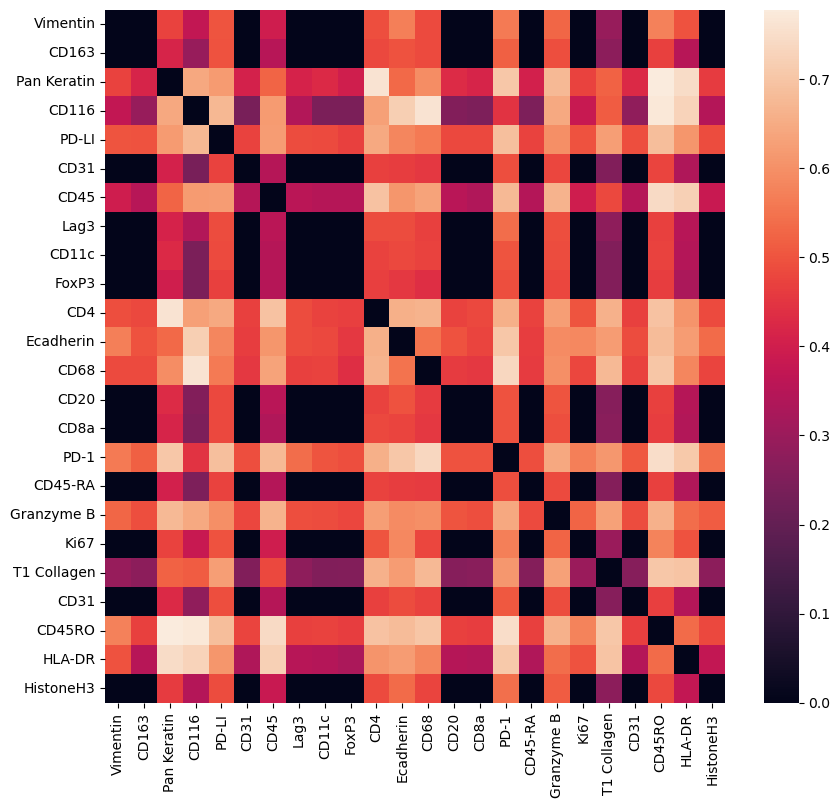

In [31]:
n = len(g.nodes)
edge_mtx = np.zeros((n, n))
for i in range(n):
    edges = g.nodes[i].edges
    for k in range(i, len(edges)):
        j = k+1
        edge_mtx[i,j] = edges[k].value
for j in range(n):
    edge_mtx[j, j] = 0
    for i in range(j+1, n):
        edge_mtx[i, j] = edge_mtx[j, i]

fig, ax = plt.subplots(figsize=(10, 9))
df = pd.DataFrame(edge_mtx)
p = sns.heatmap(df, xticklabels=True, yticklabels=True)
p.set_xticklabels(pc_markers, rotation=90)
p.set_yticklabels(pc_markers, rotation=0)
plt.show()
fig.savefig('pancreas_output/heatmap_pc.png', dpi=300)

### test

In [26]:
# !python ../train_net/predict_full_view.py --save_image  --path_run_dir 'test_models_pc_10'  --path_dataset_csv "../csv/test_path_pc.csv" --input_index   18 0 23 7 1 20 13 14 16 8 --target_index  2 3 4 5 6 9 10 11 12 15 17 19 21 22